In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
# Load the data
tweets_df = pd.read_csv("realdonaldtrump.csv", index_col=0)
y = tweets_df["retweets"] > 10_000
X = tweets_df["content"]

results = {'index':[], 'CV Score':[], 'Test Score':[]}

In [3]:
for i in range(0, 300):
    # Split with a different random_state each time.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i)

    # The optimized hyper-parameters are `max_features = 100000` and `C = 1.0`
    pipe = make_pipeline(
        CountVectorizer(stop_words = 'english', max_features = 100000),
        LogisticRegression(max_iter = 1000, C = 1.0),
    )
    pipe.fit(X_train, y_train)
    
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score = True, n_jobs = -1)
    cv_score = cv_results["test_score"].mean()
    test_score = pipe.score(X_test, y_test)
    
    results['index'].append(i)
    results['CV Score'].append(cv_score)
    results['Test Score'].append(test_score)
    
    print(f"The test score is higher than the validation score for `random_state = {i}`? {cv_score < test_score}")

The test score is higher than the validation score for `random_state = 0`? True
The test score is higher than the validation score for `random_state = 1`? True
The test score is higher than the validation score for `random_state = 2`? True
The test score is higher than the validation score for `random_state = 3`? False
The test score is higher than the validation score for `random_state = 4`? True
The test score is higher than the validation score for `random_state = 5`? True
The test score is higher than the validation score for `random_state = 6`? True
The test score is higher than the validation score for `random_state = 7`? True
The test score is higher than the validation score for `random_state = 8`? True
The test score is higher than the validation score for `random_state = 9`? True
The test score is higher than the validation score for `random_state = 10`? True
The test score is higher than the validation score for `random_state = 11`? True
The test score is higher than the val

In [1]:
df = pd.DataFrame(results)
df.describe()

NameError: name 'pd' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

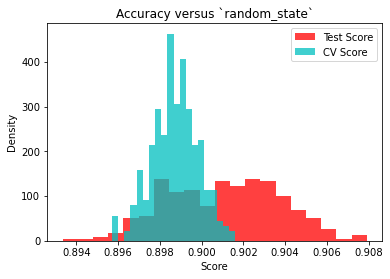

In [46]:
plt.hist(results['Test Score'], label = 'Test Score', alpha = 0.75, color = 'r', density = True, bins = 20)
plt.hist(results['CV Score'], label = 'CV Score', alpha = 0.75, color = 'c',  density = True, bins = 20)
plt.legend()
plt.title('Accuracy versus `random_state`')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show

In [42]:
greater_score = np.sum(np.greater(results['Test Score'], results['CV Score']))
length = len(results['index'])
print(f"{greater_score * 100 / length:.4}% of the cases had a higher test score the validation score.")

70.33% of the cases had a higher test score the validation score.
